In [69]:
import numpy as np
import pandas as pd
from pyod.utils.data import generate_data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from pyod.models.knn import KNN
from pyod.models import pca
from sklearn.utils import shuffle

In [2]:
contamination = 0.1 # percentage of outliers
n_train = 500       # number of training points
n_test = 500        # number of testing points
n_features = 10      # number of features
X_train, y_train, X_test, y_test = generate_data(
 n_train=n_train, n_test=n_test, n_features= n_features, contamination=contamination)
 
# Plot
# plt.scatter(X_train[0], X_train[1], c=y_train, alpha=0.8)
# plt.title('Scatter plot pythonspot.com')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

In [79]:
X_train.shape, X_test.shape

((500, 10), (500, 10))

In [80]:
y_train.shape, y_test.shape

((500,), (500,))

In [82]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9
0,4.867876,4.861021,4.893581,5.047658,4.987700,5.020154,4.948708,4.858033,4.987205,4.914730
1,5.045391,4.826668,4.953031,5.115976,4.984106,5.024913,4.974190,5.035653,4.827159,4.928788
2,5.030149,5.093709,5.036397,5.093689,5.073302,4.874456,5.003108,4.946583,4.897254,4.916711
3,4.923852,4.805676,4.990330,4.903187,4.892740,4.990352,5.149923,5.056946,5.146437,4.776329
4,5.075550,4.990221,4.925481,5.033858,4.986320,5.136969,5.023573,5.031457,5.221463,4.945609
...,...,...,...,...,...,...,...,...,...,...
495,1.195674,-3.574945,-4.897884,0.736517,-0.971506,2.969979,4.843703,1.882472,-1.249366,-0.368051
496,-2.700891,0.410017,-4.274874,4.302419,3.594697,4.050618,1.559201,-3.642461,-1.518497,-4.556928
497,-1.286184,-0.516675,0.214890,2.164345,1.981236,-0.472877,-4.561592,4.270297,-3.138236,2.077581
498,2.465191,2.931984,-2.370511,-2.153223,0.395755,2.064762,4.469127,3.528019,-1.673522,-1.471872


In [78]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

In [5]:
X_all_df = pd.concat([X_train_df, X_test_df])

In [6]:
X_all_df

,0,1,2,3,4,5,6,7,8,9
0,4.867876,4.861021,4.893581,5.047658,4.987700,5.020154,4.948708,4.858033,4.987205,4.914730
1,5.045391,4.826668,4.953031,5.115976,4.984106,5.024913,4.974190,5.035653,4.827159,4.928788
2,5.030149,5.093709,5.036397,5.093689,5.073302,4.874456,5.003108,4.946583,4.897254,4.916711
3,4.923852,4.805676,4.990330,4.903187,4.892740,4.990352,5.149923,5.056946,5.146437,4.776329
4,5.075550,4.990221,4.925481,5.033858,4.986320,5.136969,5.023573,5.031457,5.221463,4.945609
...,...,...,...,...,...,...,...,...,...,...
495,-1.821928,-1.926241,3.731896,-2.707061,-2.648710,1.785125,-3.289398,-2.133634,0.374499,-0.891921
496,0.244737,-0.199412,-2.480336,3.071822,-3.636755,0.196221,-1.885262,1.560928,0.267891,4.911915
497,-4.535021,-1.109313,0.159634,-3.949642,2.993389,1.314317,-0.214044,-3.641542,-4.545858,3.295767
498,-1.472827,1.866297,2.793643,3.496990,-0.935658,4.789980,-3.730078,-0.065505,-2.925409,-4.251579


In [11]:
total_df = X_all_df.copy()

In [12]:
total_df['target'] = y_all_df

In [13]:
total_df

,0,1,2,3,4,5,6,7,8,9,target
0,4.867876,4.861021,4.893581,5.047658,4.987700,5.020154,4.948708,4.858033,4.987205,4.914730,0.0
1,5.045391,4.826668,4.953031,5.115976,4.984106,5.024913,4.974190,5.035653,4.827159,4.928788,0.0
2,5.030149,5.093709,5.036397,5.093689,5.073302,4.874456,5.003108,4.946583,4.897254,4.916711,0.0
3,4.923852,4.805676,4.990330,4.903187,4.892740,4.990352,5.149923,5.056946,5.146437,4.776329,0.0
4,5.075550,4.990221,4.925481,5.033858,4.986320,5.136969,5.023573,5.031457,5.221463,4.945609,0.0
...,...,...,...,...,...,...,...,...,...,...,...
495,-1.821928,-1.926241,3.731896,-2.707061,-2.648710,1.785125,-3.289398,-2.133634,0.374499,-0.891921,1.0
496,0.244737,-0.199412,-2.480336,3.071822,-3.636755,0.196221,-1.885262,1.560928,0.267891,4.911915,1.0
497,-4.535021,-1.109313,0.159634,-3.949642,2.993389,1.314317,-0.214044,-3.641542,-4.545858,3.295767,1.0
498,-1.472827,1.866297,2.793643,3.496990,-0.935658,4.789980,-3.730078,-0.065505,-2.925409,-4.251579,1.0


In [17]:
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)
# If you want to see the predictions of the training data, you can use this way:
y_train_scores = clf.decision_scores_

In [18]:
y_test_pred = clf.predict(X_test) # outlier labels (0 or 1)
# Because it is '0' and '1', we can run a count statistic. There are 44 '1's and 456 '0's. The number of anomalies is roughly ten percent, as we have generated before:
unique, counts = np.unique(y_test_pred, return_counts=True)
dict(zip(unique, counts))
#{0: 456, 1: 44}
# And you can generate the anomaly score using clf.decision_function:
y_test_scores = clf.decision_function(X_test)

In [19]:
aa = pd.DataFrame(y_test_pred,columns=['outlier_yes_no'])
aa['outlier_yes_no'].value_counts()

0    450
1     50
Name: outlier_yes_no, dtype: int64

In [20]:
y_test_df=pd.DataFrame(y_test_scores, columns=['outlier_score'])

In [21]:
y_test_df

,outlier_score
0,0.202735
1,0.226013
2,0.225984
3,0.283883
4,0.257078
...,...
495,8.572883
496,9.005282
497,10.478672
498,10.485199


In [22]:
y_test_df_avg_score = y_test_df['outlier_score'].mean()

In [23]:
y_test_df_avg_score

1.1568644919618323

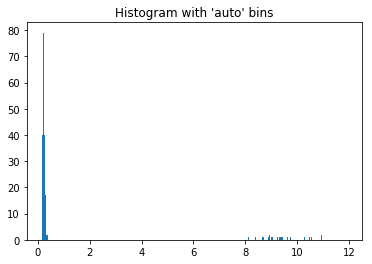

In [24]:
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [25]:
df_test = pd.DataFrame(X_test)
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<1, 0, 1)
df_test['cluster'].value_counts()
# Now let's show the summary statistics:
#df_test.groupby('y_by_average_cluster').mean()
df_test.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,score
cluster,,,,,,,,,,,
0,4.997642,4.998571,5.004065,5.000697,5.005093,5.007802,5.009865,5.004065,5.001373,5.000961,0.237917
1,-0.702352,0.084016,-0.087155,0.524469,-0.085386,0.573409,-0.053550,-0.199733,0.220779,-0.340144,9.427395


In [26]:
%%time
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
# Standardize data
X_train_norm, X_test_norm = standardizer(X_train, X_test)
# Test a range of k-neighbors from 10 to 200. There will be 20 k-NN models.
n_clf = 6
k_list = [10, 20, 30, 40, 50, 60]
# Just prepare data frames so we can store the model results
train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([X_test.shape[0], n_clf])
train_scores.shape
# Modeling
print("modeling....")
for i in range(n_clf):
    print("---------------i: " + str(i))
    k = k_list[i]
    clf = KNN(n_neighbors=k, method='largest')
    clf.fit(X_train_norm)

    # Store the results in each column:
    
    train_scores[:, i] = clf.decision_scores_
    test_scores[:, i] = clf.decision_function(X_test_norm) 
print("finished modeling...")
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

modeling....
---------------i: 0
---------------i: 1
---------------i: 2
---------------i: 3
---------------i: 4
---------------i: 5
finished modeling...
Wall time: 248 ms


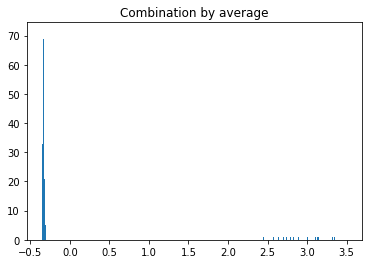

In [27]:
y_by_average = average(test_scores_norm)
plt.hist(y_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [28]:
#df_test = pd.DataFrame(X_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<0, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    450
1     50
Name: y_by_average_cluster, dtype: int64

In [29]:
df_test.groupby('y_by_average_cluster').mean()

,0,1,2,3,4,5,6,7,8,9,score,cluster,y_by_average_score
y_by_average_cluster,,,,,,,,,,,,,
0,4.997642,4.998571,5.004065,5.000697,5.005093,5.007802,5.009865,5.004065,5.001373,5.000961,0.237917,0,-0.331814
1,-0.702352,0.084016,-0.087155,0.524469,-0.085386,0.573409,-0.053550,-0.199733,0.220779,-0.340144,9.427395,1,2.922316


In [30]:
qq = df_test[df_test['y_by_average_cluster'] ==1]
qq.shape

(50, 14)

In [31]:
qq = df_test[df_test['y_by_average_score'] > 2.484086]
qq.shape

(47, 14)

# maximization

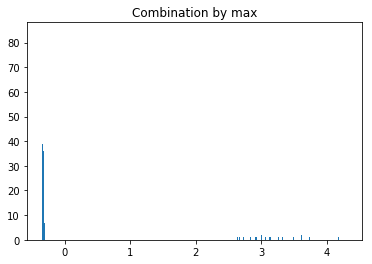

In [32]:
y_by_maximization = maximization(test_scores_norm)             
plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

In [33]:
#df_test = pd.DataFrame(X_test)
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<0, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()

0    450
1     50
Name: y_by_maximization_cluster, dtype: int64

In [34]:
df_test.groupby('y_by_maximization_cluster').mean()

,0,1,2,3,4,5,6,7,8,9,score,cluster,y_by_average_score,y_by_average_cluster,y_by_maximization_score
y_by_maximization_cluster,,,,,,,,,,,,,,,
0,4.997642,4.998571,5.004065,5.000697,5.005093,5.007802,5.009865,5.004065,5.001373,5.000961,0.237917,0,-0.331814,0,-0.328871
1,-0.702352,0.084016,-0.087155,0.524469,-0.085386,0.573409,-0.053550,-0.199733,0.220779,-0.340144,9.427395,1,2.922316,1,3.215727


## avg of max

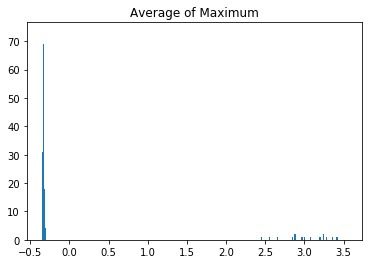

In [35]:
# Combination by aom
y_by_aom = aom(test_scores_norm, n_buckets=5,method='dynamic')
             
plt.hist(y_by_aom, bins='auto')  # arguments are passed to np.histogram
plt.title("Average of Maximum")
plt.show()

In [36]:
#df_test = pd.DataFrame(X_test)
df_test['y_by_aom_score'] = y_by_aom
df_test['y_by_aom_cluster'] = np.where(df_test['y_by_aom_score']<0, 0, 1)
df_test['y_by_aom_cluster'].value_counts()

0    450
1     50
Name: y_by_aom_cluster, dtype: int64

In [37]:
df_test.groupby('y_by_aom_cluster').mean()

,0,1,2,3,4,5,6,7,8,9,score,cluster,y_by_average_score,y_by_average_cluster,y_by_maximization_score,y_by_maximization_cluster,y_by_aom_score
y_by_aom_cluster,,,,,,,,,,,,,,,,,
0,4.997642,4.998571,5.004065,5.000697,5.005093,5.007802,5.009865,5.004065,5.001373,5.000961,0.237917,0,-0.331814,0,-0.328871,0,-0.331004
1,-0.702352,0.084016,-0.087155,0.524469,-0.085386,0.573409,-0.053550,-0.199733,0.220779,-0.340144,9.427395,1,2.922316,1,3.215727,1,3.001021


# max of avg

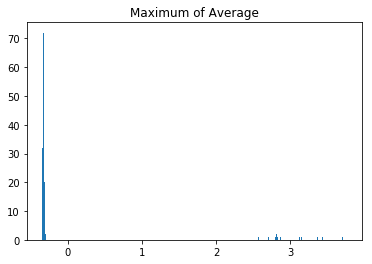

In [38]:
# Combination by moa
y_by_moa = moa(test_scores_norm, n_buckets=5, method='dynamic')
plt.hist(y_by_moa, bins='auto')  # arguments are passed to np.histogram
plt.title("Maximum of Average")
plt.show()

In [39]:
#df_test = pd.DataFrame(X_test)
df_test['y_by_moa_score'] = y_by_moa
df_test['y_by_moa_cluster'] = np.where(df_test['y_by_moa_score']<0, 0, 1)
df_test['y_by_moa_cluster'].value_counts()

0    450
1     50
Name: y_by_moa_cluster, dtype: int64

In [40]:
df_test.groupby('y_by_moa_cluster').mean()

,0,1,2,3,4,5,6,7,8,9,score,cluster,y_by_average_score,y_by_average_cluster,y_by_maximization_score,y_by_maximization_cluster,y_by_aom_score,y_by_aom_cluster,y_by_moa_score
y_by_moa_cluster,,,,,,,,,,,,,,,,,,,
0,4.997642,4.998571,5.004065,5.000697,5.005093,5.007802,5.009865,5.004065,5.001373,5.000961,0.237917,0,-0.331814,0,-0.328871,0,-0.331004,0,-0.330533
1,-0.702352,0.084016,-0.087155,0.524469,-0.085386,0.573409,-0.053550,-0.199733,0.220779,-0.340144,9.427395,1,2.922316,1,3.215727,1,3.001021,1,3.075120


In [77]:
df_test.shape

(500, 20)

# selecting outliers that match according to all clusters

In [41]:
clusters = df_test[['y_by_average_cluster', 'y_by_maximization_cluster', 'y_by_aom_cluster', 'y_by_moa_cluster']]

In [42]:
clusters

,y_by_average_cluster,y_by_maximization_cluster,y_by_aom_cluster,y_by_moa_cluster
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
495,1,1,1,1
496,1,1,1,1
497,1,1,1,1
498,1,1,1,1


In [43]:
outliers_by_algos = clusters[ 
          (clusters['y_by_average_cluster'] == 1) & 
          (clusters['y_by_maximization_cluster']==1) &
          (clusters['y_by_aom_cluster']==1)  &
          (clusters['y_by_moa_cluster']==1)            ]

In [44]:
outliers_by_algos.shape

(50, 4)

In [45]:
 outliers_by_algos.index

Int64Index([450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462,
            463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475,
            476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488,
            489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499],
           dtype='int64')

In [48]:
oo = clf.fit_predict(total_df.drop(columns=['target']))

In [49]:
type(oo)

numpy.ndarray

In [71]:
aa = pd.DataFrame(oo,columns=['outlier_yes_no'])
aa = shuffle(aa)
vals = aa['outlier_yes_no'].value_counts()

In [72]:
vals = vals.sort_index()

In [73]:
vals

0    900
1    100
Name: outlier_yes_no, dtype: int64

In [76]:
aa[aa['outlier_yes_no']==1].shape

(100, 1)